<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week09/analysis_of_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of KMeans
- Michael Vincent
- 8/15

Note: We were not able to find a data dictionary, so we made the assumption that income, card debt, and other debt were all in units of thousands of US dollars.

## Code From Previous Exercise


### Imports

In [105]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Load the data

In [106]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQAN-9j-p2mev8feKxRp9l8cfRjisQwl39X31e7iRtYLy0ICRk0harNzLHreWiDJMHqucLfGCYSZlR6/pub?output=csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


### Clean and process the data

In [107]:
# Check for duplicates and missing values.
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicates: 0
Missing Values: 150


In [108]:
# Drop the Unnamed: 0 column and the customer id column.
df.drop(columns = ['Unnamed: 0', 'Customer Id'], inplace = True)

# Make sure the column was dropped.
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [109]:
# Check the missing values more carefully
print(df.isna().sum())
print()
df['Defaulted'].value_counts()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64



0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [110]:
# Impute the missing values in 'Defaulted' with the 
# most frequent value.
df['Defaulted'].fillna(0, inplace = True)

# Make sure the values were imputed
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [111]:
# Create a scaled copy of the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

### KMeans

In [112]:
# Create lists of inertias and silhouette scores
inertias = []
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

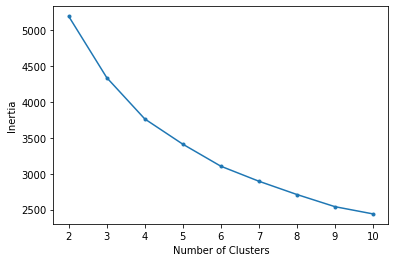

In [113]:
# Graph the inertias
plt.plot(range(2, 11), inertias, marker = '.');
plt.xlabel('Number of Clusters');
plt.ylabel('Inertia');

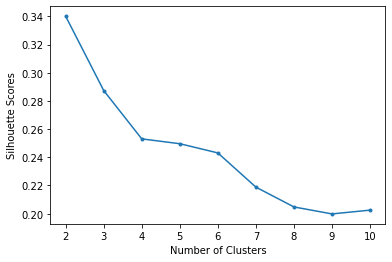

In [114]:
# Graph the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker = '.');
plt.xlabel('Number of Clusters');
plt.ylabel('Silhouette Scores');

### Visualizations

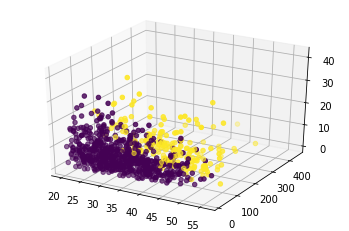

In [115]:
# Create a 3D visulization using 'Age', 'Income', 
# and 'DebtIncomeRatio' using 2 clusters
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(scaled_df)
df['clusters'] = kmeans.labels_
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter(df['Age'], df['Income'], df['DebtIncomeRatio'], c = df['clusters'])

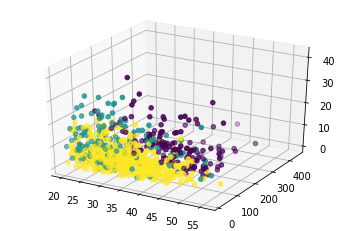

In [116]:
# Create a 3D visulization using 'Age', 'Income', 
# and 'DebtIncomeRatio' using 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(scaled_df)
df['clusters'] = kmeans.labels_
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter(df['Age'], df['Income'], df['DebtIncomeRatio'], c = df['clusters'])

### Final Model

While _k_ = 2 gives the best silhouette score, we think _k_ = 3 gives the best compromise between the silhouette score and the inertia. 

In [117]:
# Build the final model
final_model = KMeans(n_clusters = 3)
final_model.fit(scaled_df)
print('Intertia:', final_model.inertia_)
print('Silhouette Score:', silhouette_score(scaled_df, final_model.labels_))

Intertia: 4339.0172944029855
Silhouette Score: 0.28738683325129355


## Bar graphs

In [118]:
# Make a DataFrame for the final model.
final_df = df.copy()
final_df['clusters'] = final_model.labels_

# Make a DataFrame grouped by clusters
cluster_groups = final_df.groupby('clusters', as_index = False).mean()
cluster_groups

,clusters,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
1,1,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,2,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578


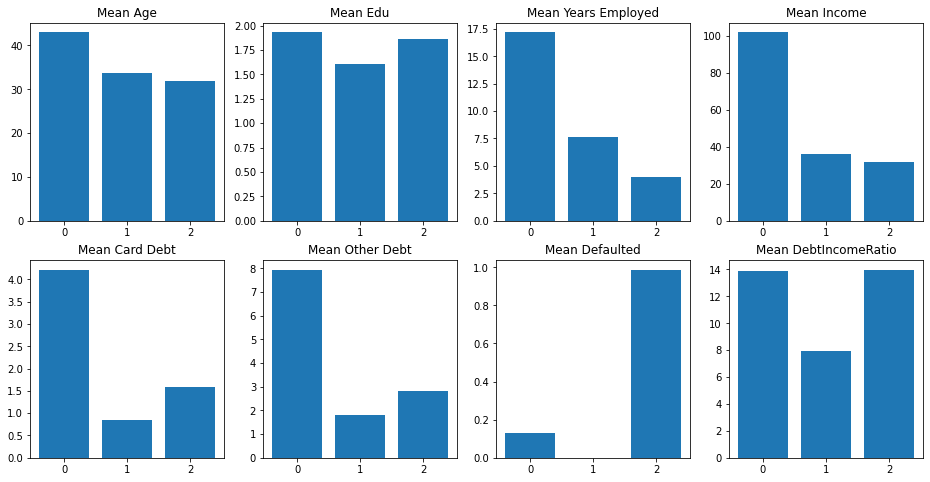

In [119]:
# Make bar charts of each feature by cluster
fig, axes = plt.subplots(2, 4, figsize = (16, 8));
axes = axes.ravel();
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['clusters'], cluster_groups[col]);
  axes[i].set_title(f'Mean {col}')

## Analysis of clusters

### Cluster 0

- Average age of about 42.
- Highest level of education among the clusters. (Although there is little difference in the education levels of the clusters.)
- Employed the longest with an average years employed of about 17.
- Makes the most money with a mean income of \$100,000.
- Highest level of card debt around \$4,000.
- Highest level of 'other' around \$8,000.
- Low defualt rate.
- Ties cluster 1 for highest debt income ratio.

The members of cluster 0 have high levels of debt, but they make the most money, and have the most job experience. Since their debt to income ratio is about the same as cluster 1, which has the highest default rate, we conjecture that it is the length of employment and higher relative age that explain why cluster 0 has such a low default rate.


### Cluster 1

- Average age of about 31.
- High level of education. Only slightly lower than cluster 0.
- The least amount of job experience. Average length of employment is about 3 years.
- Makes the least amount of money with a mean income of about \$30,000.
- Average card debt is about \$1,500.
- Average other debt is about \$3,000.
- Default rate is close to 1. Nearly every member of this cluster defaulted.
- Has a very high debt to income ratio. Almost the same as cluster 0.

We conjecture the lower average age as well as the lack of job experience is what explains why this cluster has such a high default rate.

### Cluster 2

- Average age of about 32. Slightly older than cluster 1
- Lowest level of education among all the clusters.
- Mean length of employment is about 8 years. A typical member of cluster 2 has been employed twice as long as a typical member of cluster 1.
- Mean income of about \$32,000. Only slightly higher than cluster 1.
- Lowest average card debt of about \$800. 
- Lowest other debt of about \$1,800.
- Best default rate of all the clusters. No member of cluster 2 has defaulted.
- Has a debt to income ratio little more than half of the other clusters.

Cluster 2 is similar to cluster 1 in many ways. Similar ages and similar incomes. Cluster 2 has less education, however they have less overall debt and a lower debt to income ratio. We strongly feel the lower debt to income ratio explains why nobody from cluster 2 has defaulted.